## KNN Classifer

To study and demonstrate knn classifer for the MNIST Dataset. For an composite classifier model, it performs quite well on knn classifer.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


In [2]:
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Normalize
X = X / 255.0  

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Loading MNIST dataset...
Training set size: (56000, 784)
Test set size: (14000, 784)


In [3]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [4]:
y_pred = knn.predict(X_test)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))


Accuracy on test set: 0.9712857142857143


/workspaces/ml-notes-and-code/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/workspaces/ml-notes-and-code/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/workspaces/ml-notes-and-code/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/workspaces/ml-notes-and-code/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/workspaces/ml-notes-and-code/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X do

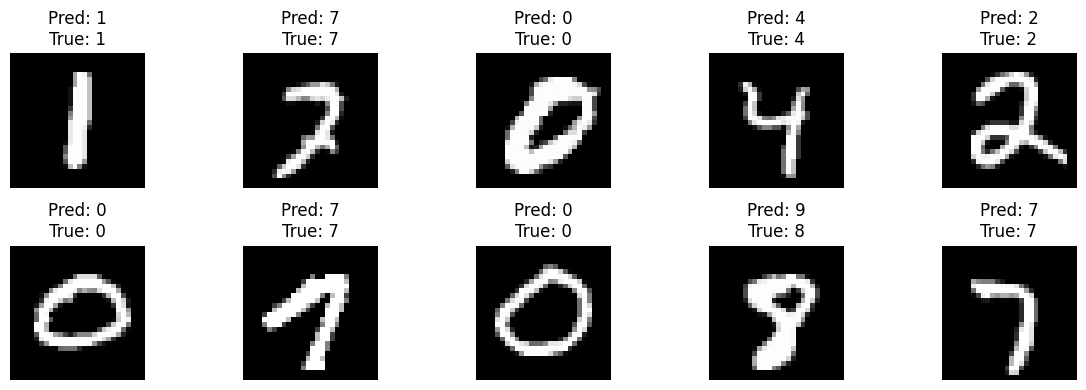

In [6]:
n_samples = 10
indices = np.random.choice(len(X_test), n_samples, replace=False)

plt.figure(figsize=(12, 4))
for i, idx in enumerate(indices):
    sample = X_test.iloc[idx].to_numpy().reshape(1, -1)
    prediction = knn.predict(sample)[0]
    actual = y_test.iloc[idx]

    plt.subplot(2, 5, i+1)
    plt.imshow(X_test.iloc[idx].to_numpy().reshape(28, 28), cmap="gray")
    plt.title(f"Pred: {prediction}\nTrue: {actual}")
    plt.axis("off")

plt.tight_layout()
plt.show()


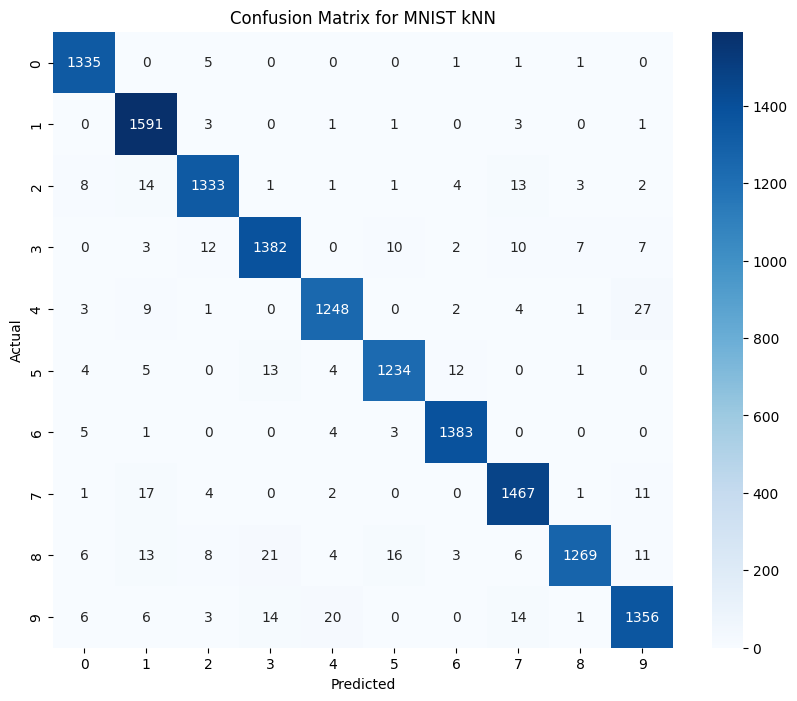

In [7]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for MNIST kNN")
plt.show()
